In [407]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
import matplotlib.pyplot as plt

url = "https://api.hypixel.net/skyblock/auctions"

r = requests.get(url).json()
total_pages = int(r['totalPages'])
total_pages
df3 = pd.DataFrame()
def fetch_auction_house(page_number:int) -> pd.DataFrame:
        response = requests.get(f'{url}?page={page_number}')
        auctions_data = response.json()['auctions']
        df = pd.DataFrame(auctions_data)
        df.drop(columns=['auctioneer','profile_id','coop', 'extra','item_lore','tier','item_bytes','claimed_bidders','item_uuid','bids'],inplace=True)
        return df

def clean_dataframe(df:pd.DataFrame) -> pd.DataFrame:
        df['start'] = pd.to_datetime(df['start'], unit='ms')
        df['end'] = pd.to_datetime(df['end'], unit='ms')
        df['last_updated'] = pd.to_datetime(df['last_updated'], unit='ms')
        return df



for i in range(total_pages):
   df3 = pd.concat( [df3, fetch_auction_house(i)])

df = clean_dataframe(df3)

df

,uuid,start,end,item_name,category,starting_bid,claimed,highest_bid_amount,last_updated,bin
0,da4a6cec31f2415c9c6382bf1ea34225,2024-07-16 05:52:31.648,2024-07-18 05:52:31.648,[Lvl 51] Enderman,misc,100000,False,0,2024-07-16 05:52:31.648,False
1,79414d802863487383aca70049f1971d,2024-07-16 05:52:30.901,2024-07-16 11:52:30.901,Jumbo Backpack,misc,6740000,False,0,2024-07-16 05:52:30.901,True
2,852a2ac0902f4d879d34ddfdb900aea7,2024-07-16 05:52:30.756,2024-07-18 05:52:30.756,Terror Chestplate,armor,12999999,False,0,2024-07-16 05:52:30.756,True
3,c54d19b376594fc1bc5153ce315f5b98,2024-07-16 05:52:30.606,2024-07-18 05:52:30.606,Aurora Staff,weapon,1500000,False,0,2024-07-16 05:52:30.606,True
4,a1241ca92adf41e29ac931863614c73e,2024-07-16 05:52:29.248,2024-07-16 11:52:29.248,Blooming Lotus Bracelet,misc,199000,False,0,2024-07-16 05:52:29.248,True
...,...,...,...,...,...,...,...,...,...,...
590,96c20ca7f39e4d3683b189205a838f67,2024-07-02 04:55:12.235,2024-07-16 06:55:12.235,[Lvl 2] Ghoul,misc,10000000,False,0,2024-07-02 04:55:12.235,True
591,81dff76b4e8341ddaa0d86dd529a67ba,2024-07-02 04:45:12.672,2024-07-16 06:45:12.672,Ancient Mender Crown ✪✪✪✪✪,armor,49500000,False,0,2024-07-02 04:45:12.672,True
592,5b727525fe0f416c92cf8a996b1948ff,2024-07-02 04:33:42.123,2024-07-16 06:33:42.123,Molten Necklace,misc,10000000,False,0,2024-07-02 04:33:42.123,True
593,c664362f154c42afa9e3b23480bb014f,2024-07-02 04:12:10.608,2024-07-16 06:12:10.608,Thunderbolt Necklace,misc,3340000,False,0,2024-07-02 04:12:10.608,True


In [408]:
# Using threading improved avg runtime from 25 - 30seconds to 3 - 4 (Thanks ChatGPT for the help)

url = "https://api.hypixel.net/skyblock/auctions"
r = requests.get(url).json()
total_pages = int(r['totalPages'])


# For loops through the total_number of pages on the market place, requesting JSON for each page
# Each page contains a max of 1000 Items
def fetch_auction_house(page_number: int) -> pd.DataFrame:
    response = requests.get(f'{url}?page={page_number}')
    auctions_data = response.json()['auctions']
    df = pd.DataFrame(auctions_data)
    return df
# Clean DataFrame
# Remove unnescessary code
# Change all timestamps from UNIX to yyyy/mm/dd hour/min/sec/ms format
def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df.drop(columns=['auctioneer', 'profile_id', 'coop', 'extra', 'item_lore', 'item_bytes', 'claimed_bidders', 'item_uuid', 'bids'], inplace=True)
    df['start'] = pd.to_datetime(df['start'], unit='ms')
    df['end'] = pd.to_datetime(df['end'], unit='ms')
    df['last_updated'] = pd.to_datetime(df['last_updated'], unit='ms')
    desired_order = ['item_name','tier','uuid','starting_bid','highest_bid_amount','category', 'start','end','last_updated', 'claimed','bin']
    df = df[desired_order]
    return df


#ChatGPT helped me with this one, ill need someone to explain this to me
# Use ThreadPoolExecutor to fetch pages concurrently
def fetch_all_pages_concurrently(total_pages: int) -> pd.DataFrame:
    with ThreadPoolExecutor(max_workers=15) as executor:
        futures = [executor.submit(fetch_auction_house, i) for i in range(total_pages)]
        result = pd.concat([future.result() for future in futures], ignore_index=True)
    return result

df3 = fetch_all_pages_concurrently(total_pages)
df = clean_dataframe(df3)

df

,item_name,tier,uuid,starting_bid,highest_bid_amount,category,start,end,last_updated,claimed,bin
0,[Lvl 51] Enderman,EPIC,da4a6cec31f2415c9c6382bf1ea34225,100000,0,misc,2024-07-16 05:52:31.648,2024-07-18 05:52:31.648,2024-07-16 05:52:31.648,False,False
1,Jumbo Backpack,LEGENDARY,79414d802863487383aca70049f1971d,6740000,0,misc,2024-07-16 05:52:30.901,2024-07-16 11:52:30.901,2024-07-16 05:52:30.901,False,True
2,Terror Chestplate,LEGENDARY,852a2ac0902f4d879d34ddfdb900aea7,12999999,0,armor,2024-07-16 05:52:30.756,2024-07-18 05:52:30.756,2024-07-16 05:52:30.756,False,True
3,Aurora Staff,LEGENDARY,c54d19b376594fc1bc5153ce315f5b98,1500000,0,weapon,2024-07-16 05:52:30.606,2024-07-18 05:52:30.606,2024-07-16 05:52:30.606,False,True
4,Blooming Lotus Bracelet,RARE,a1241ca92adf41e29ac931863614c73e,199000,0,misc,2024-07-16 05:52:29.248,2024-07-16 11:52:29.248,2024-07-16 05:52:29.248,False,True
...,...,...,...,...,...,...,...,...,...,...,...
58590,[Lvl 2] Ghoul,EPIC,96c20ca7f39e4d3683b189205a838f67,10000000,0,misc,2024-07-02 04:55:12.235,2024-07-16 06:55:12.235,2024-07-02 04:55:12.235,False,True
58591,Ancient Mender Crown ✪✪✪✪✪,LEGENDARY,81dff76b4e8341ddaa0d86dd529a67ba,49500000,0,armor,2024-07-02 04:45:12.672,2024-07-16 06:45:12.672,2024-07-02 04:45:12.672,False,True
58592,Molten Necklace,EPIC,5b727525fe0f416c92cf8a996b1948ff,10000000,0,misc,2024-07-02 04:33:42.123,2024-07-16 06:33:42.123,2024-07-02 04:33:42.123,False,True
58593,Thunderbolt Necklace,EPIC,c664362f154c42afa9e3b23480bb014f,3340000,0,misc,2024-07-02 04:12:10.608,2024-07-16 06:12:10.608,2024-07-02 04:12:10.608,False,True


In [387]:
def find_item(item_name:str, specified_price:int) -> pd.DataFrame:
    filtered_df = df[df['item_name'] == item_name]
    filtered_df = filtered_df.sort_values(by=['starting_bid'])
    filtered_df = filtered_df.query(f'starting_bid < {specified_price} and bin == True and claimed == False')
    filtered_df.loc[:,'uuid'] = '/viewauction ' + filtered_df['uuid'].astype(str)
    if filtered_df.empty:
        return "Item not with specified Parameters"
    return filtered_df

find_item('Portal Dye', 81000000)

'Item not with specified Parameters'

In [409]:
# Search Dictionary 
# USAGE
# Key = item_name
# Value = Maximum value of item
# search_dict = {
#   'Key': Value,
#   'Key': Value,
# }


search_dict = {
    'Portal Dye':100000000,
    'Molten Cloak': 900000,
    'Molten Belt': 900000		
    }

def find_item_under_price(item_name:str, specified_price:int) -> pd.DataFrame:
    # Filter by name
    filtered_df = df[df['item_name'] == item_name]
    # Sort by the values in starting_bid
    filtered_df = filtered_df.sort_values(by=['starting_bid'])
    # Query works like an if which allows us to search for rows where bin == True and claimed == False and starting_bid is less than specified_price
    filtered_df = filtered_df.query(f'starting_bid < {specified_price} and bin == True and claimed == False')
    # Set uuid in filtered_df to be command version /viewauction + uuid
    filtered_df.loc[:,'uuid'] = '/viewauction ' + filtered_df['uuid'].astype(str)
    if filtered_df.empty:
        return pd.DataFrame(columns=df.columns)
    return filtered_df

def find_item_lbin(item_name:str) -> pd.DataFrame:
    # Filter by name
    filtered_df =  df[df['item_name'] == item_name]
    # Sort by the values in starting_bid
    filtered_df = filtered_df.sort_values(by=['starting_bid'])
    # Query works like an if which allows us to search for rows where bin == True and claimed == False
    filtered_df = filtered_df.query(f'bin == True and claimed == False')
    # Because the DF is sorted by starting_bid, we can return the first row and that will be the lbin
    filtered_df = filtered_df.head(1)
    # Set uuid in filtered_df to be command version /viewauction + uuid
    filtered_df.loc[:,'uuid'] = '/viewauction ' + filtered_df['uuid'].astype(str)
    if filtered_df.empty:
        return pd.DataFrame(columns=df.columns)
    return filtered_df

# Initialize df4 as a Dataframe for later use
df4 = pd.DataFrame(columns=df.columns)

# Loop through Dictionary
# This is a helper function that works with find_item_under_price
# NOTES: This function returns an appended Dataframe
# Uses search_dict above as the search criteria
def find_item_under_price_helper() -> pd.DataFrame:
    global df4
    for item_name, specified_price in search_dict.items():
        # Call find_item_under_price and set result equal to it
        result = find_item_under_price(item_name, specified_price)
        # Concat result to current working dataframe
        df4 = pd.concat([df4, result], ignore_index=True)
    return df4

# Loop through Dictionary
# This is a helper function that works with find_item_lbin
# NOTES: This function returns an appended Dataframe
# Uses search_dict above as the search criteria
def find_item_lbin_helper() -> pd.DataFrame:
    global df4
    for item_name in search_dict.keys():
        # Call find_item_under_lbin and set result equal to it
        result = find_item_lbin(item_name)
        # Concat result to current working dataframe
        df4 = pd.concat([df4,result], ignore_index=True)
    return df4

#find_item_under_price_df = find_item_under_price_helper()
#find_item_under_price_df

find_item_lbin_df = find_item_lbin_helper()
find_item_lbin_df

C:\Users\jdangelo\AppData\Local\Temp\ipykernel_24164\2147780939.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df4 = pd.concat([df4,result], ignore_index=True)


,item_name,tier,uuid,starting_bid,highest_bid_amount,category,start,end,last_updated,claimed,bin
0,Portal Dye,MYTHIC,/viewauction ce14c1e230f54442be4f158b11157604,87800000,0,misc,2024-07-16 05:44:50.121,2024-07-18 05:44:50.121,2024-07-16 05:44:50.121,False,True
1,Molten Cloak,EPIC,/viewauction 34e93d035659497a831c0c2bc1a23367,1000000,0,misc,2024-07-16 05:09:55.175,2024-07-16 11:09:55.175,2024-07-16 05:09:55.175,False,True
2,Molten Belt,EPIC,/viewauction f7b9a490ce5243b09d32c25a215fe8f1,997000,0,misc,2024-07-15 23:55:31.780,2024-07-16 05:55:31.780,2024-07-15 23:55:31.780,False,True


In [319]:
class Shareholder:
    def __init__(self, PersonName:str, InitialItemsInvested:dict):
        self.PersonName = PersonName
        self.InitialItemsInvested = InitialItemsInvested



In [337]:
person1 = Shareholder("Banyan",
                      { 'Portal Dye':78000000,
                        'Molten Cloak': 900000,
                        'Molten Belt': 900000	})

In [481]:
Item_Data = 'DYE_LUCKY'
response = requests.get(f'https://sky.coflnet.com/api/item/price/{Item_Data}/history/full').json()
cofl_API_df = pd.DataFrame(response)
CurrentPrice = df.tail(1)
cofl_API_df['time'] = pd.to_datetime(cofl_API_df['time'])
cofl_API_df

,min,max,avg,volume,time
0,49.0,300000000.0,39367900.0,9339,2024-03-16
1,36.0,140000000.0,30757500.0,3123,2024-03-17
2,2690000.0,533333000.0,29860000.0,623,2024-03-21
3,500.0,34000000.0,26123800.0,595,2024-03-22
4,24.0,25000000.0,23816400.0,360,2024-03-25
...,...,...,...,...,...
102,60000000.0,71500000.0,67334896.0,95,2024-07-11
103,55000000.0,68700000.0,63216300.0,62,2024-07-12
104,53000000.0,65000000.0,60903300.0,147,2024-07-13
105,60000000.0,73000000.0,67194496.0,151,2024-07-14


In [466]:
int(CurrentPrice['avg'].iloc[0])

desired_date = '2024-05-12'  # Example date in YYYY-MM-DD format

# Filter the DataFrame using loc for the desired date
filtered_cofl_API_df = cofl_API_df[cofl_API_df['time'] == desired_date]
int(filtered_cofl_API_df['avg'].iloc[0])


29817200

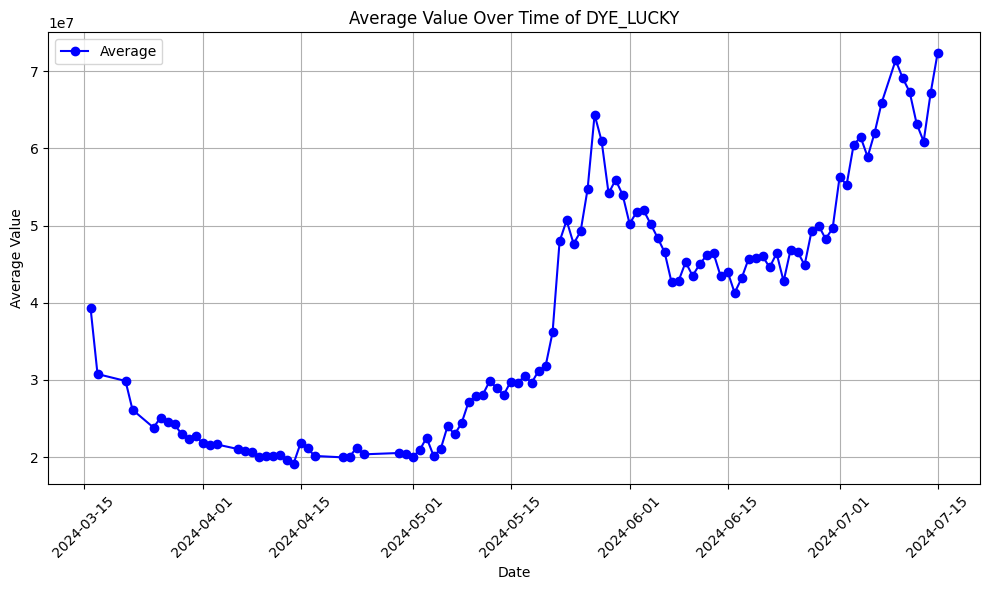

In [420]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(cofl_API_df['time'], cofl_API_df['avg'], marker='o', linestyle='-', color='b', label='Average')
plt.title(f'Average Value Over Time of {Item_Data}')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [464]:

response = requests.get(f'https://api.hypixel.net/v2/resources/skyblock/items').json()['items']
test = pd.DataFrame(response)
test.drop(columns=['material','tier','skin', 'category', 'npc_sell_price', 'rarity_salvageable', 'salvages', 'has_uuid','unstackable','color','glowing','stats','can_auction','can_trade', 'gemstone_slots','soulbound', 'requirements','can_place', 'museum', 'generator', 'generator_tier', 'furniture','item_specific','description','upgrade_costs','gear_score','dungeon_item','dungeon_item_conversion_cost','catacombs_requirements','can_have_attributes','salvageable_from_recipe','enchantments','double_tap_to_drop','hide_from_viewrecipe_command','sword_type','ability_damage_scaling','origin','tiered_stats','motes_sell_price','crystal','rift_transferrable','durability','can_burn_in_furnace','salvage','serializable','can_interact','can_interact_right_click','private_island','can_recombobulate','can_have_power_scroll','can_interact_entity','MINING_FORTUNE','cannot_reforge','lose_motes_value_on_transfer','prestige'], inplace=True)


filtered_df = test[test['name'].isin(search_dict.keys())]
id_list = []
# Print the names as strings
for id in filtered_df['id']:
    id_list.append(id)

id_list

['DYE_PORTAL', 'MOLTEN_BELT', 'MOLTEN_CLOAK']

In [480]:
datetime.datetime.today().strftime('%Y-%m-%d')


'2024-07-16'